<a href="https://colab.research.google.com/github/Suresh8352/Gold_Price_Prediction/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries

In [421]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

Data Collection and Processing

In [422]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('/content/drive/MyDrive/Placement_2024/Projects_Noncore/Gold_Price/gold_price_data.csv')

In [423]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [424]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [425]:
#Finding missing values
gold_data.isna().sum().sort_values(ascending=False)

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [426]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [427]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [428]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [429]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Positive Correlation
2. Negative Correlation

In [430]:
correlation = gold_data.corr()

<ipython-input-430-b9d572e5c3ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

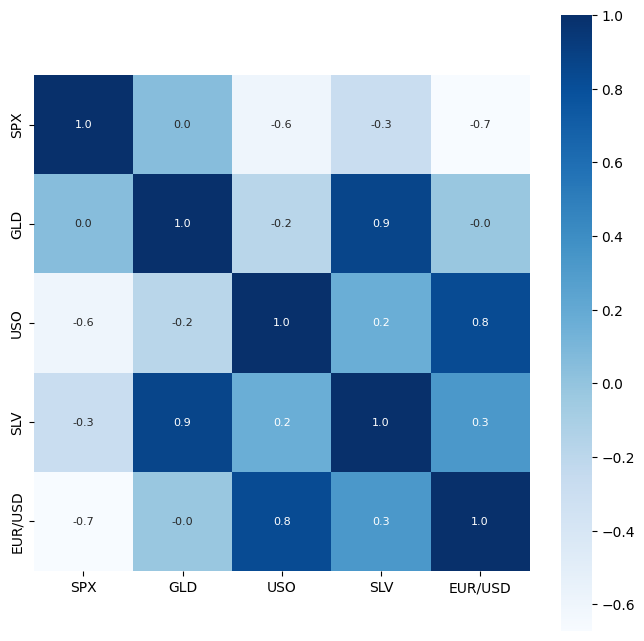

In [431]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [432]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


##Note:

Here the two columns SLV and GLD are strongly correlated with each other compared to others, here we will drop SLV since GLD column also has a large correlation with our target column. Here We have used the pandas Drop function to drop the column along axis=1.

In [433]:
gold_data.drop("SLV", axis=1,
             inplace=True)

###EDA

In [434]:
gold_data.head(1)

,Date,SPX,GLD,USO,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,1.471692


In [435]:
# reset the index to date column
gold_data.set_index("Date", inplace=True)


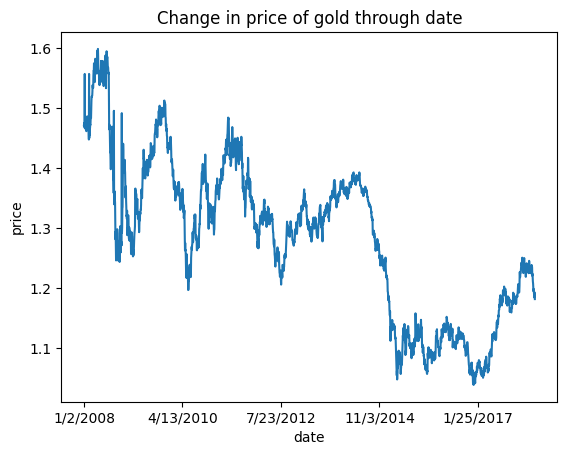

In [436]:
gold_data["EUR/USD"].plot()
plt.title("Change in price of gold through date")
plt.xlabel("date")
plt.ylabel("price")
plt.show()

## Trend in Gold Prices Using Moving Averages

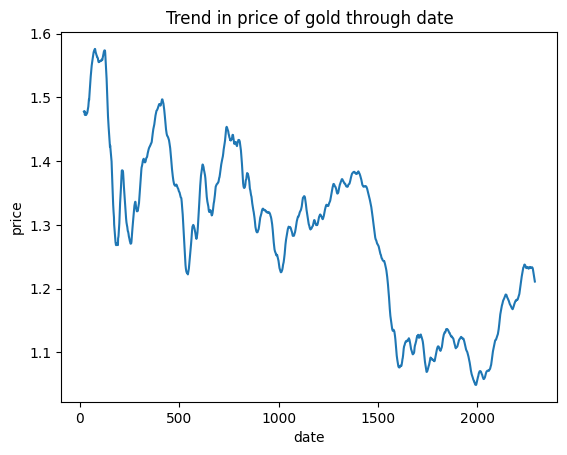

In [437]:
# apply rolling mean with window size of 3
gold_data["price_trend"] = gold_data["EUR/USD"]\
    .rolling(window=20).mean()

# reset the index to date column
gold_data.reset_index("Date", inplace=True)

# since we have used rolling method
# for 20 rows first 2 rows will be NAN
gold_data["price_trend"].loc[20:].plot()

# set title of the chart
plt.title("Trend in price of gold through date")

# set x_label of the plot
plt.xlabel("date")
plt.ylabel("price")
plt.show()

# Distribution of Columns
To see the distribution of numerical columns we can plot the histogram of each column in one figure to do this we have to use the Matplotlib subplot function

In [438]:
gold_data.shape

(2290, 6)

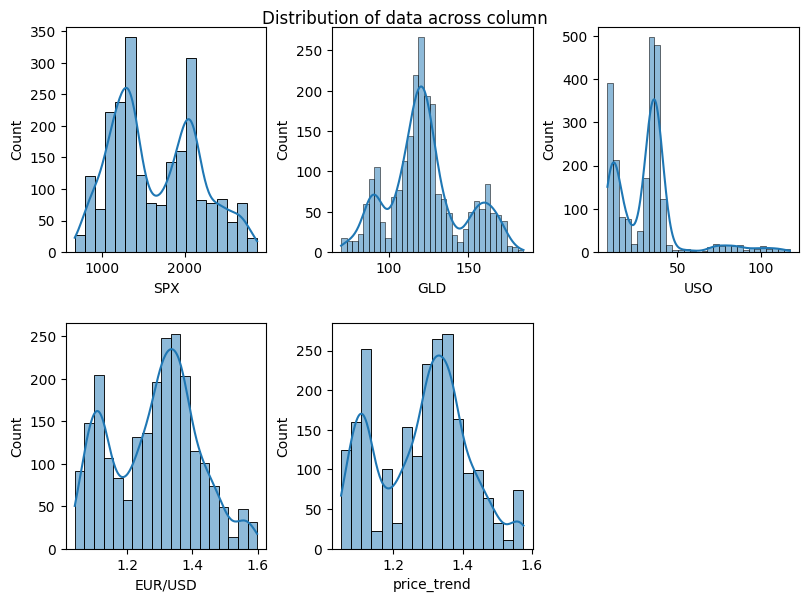

In [439]:
fig = plt.figure(figsize=(8, 6))

# suptitle of the graph
fig.suptitle('Distribution of data across column')
temp = gold_data.drop("Date", axis=1).columns.tolist()
for i, item in enumerate(temp):
    plt.subplot(2, 3, i+1)
    sns.histplot(data=gold_data, x=item, kde=True)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.show()

In [440]:
# Skewness check
print(gold_data.skew(axis=0,skipna=True))

SPX            0.300362
GLD            0.334138
USO            1.699331
EUR/USD       -0.005292
price_trend   -0.029588
dtype: float64


<ipython-input-440-2b5d28da1a42>:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(gold_data.skew(axis=0,skipna=True))


In [441]:
gold_data["USO"] = gold_data["USO"].apply(lambda x: np.sqrt(x))

##  Handling Outliers:
Outliers can have a very bad effect on our model like in linear regression if a data point is an outlier then it can add a very large mean square error. Removing outliers is a good process in EDA. Some models like Decisiontree and ensemble methods like RandomForests are not that much by outliers. However, it is always a good practice to handle the outlier.

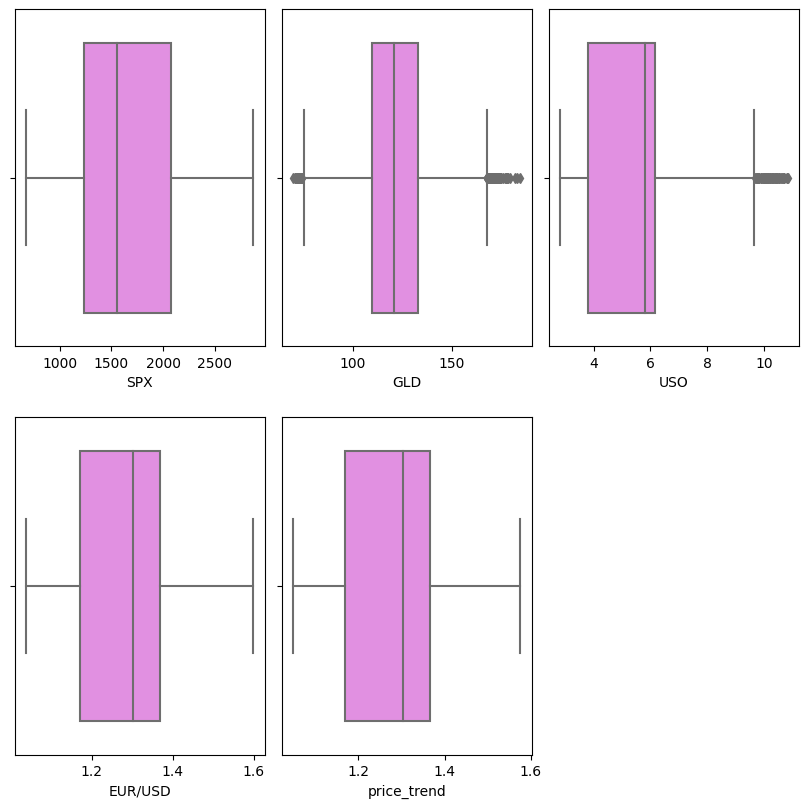

In [442]:
# Box plot
fig = plt.figure(figsize=(8, 8))
temp = gold_data.drop("Date", axis=1).columns.tolist()
for i, item in enumerate(temp):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=gold_data, x=item, color='violet')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.show()

In [443]:
# outliers removing
def outlier_removal(column):
    # Capping the outlier rows with Percentiles
    upper_limit = column.quantile(.95)
    # set upper limit to 95percentile
    lower_limit = column.quantile(.05)
    # set lower limit to 5 percentile
    column.loc[(column > upper_limit)] = upper_limit
    column.loc[(column < lower_limit)] = lower_limit
    return column

In [444]:

gold_data[['SPX', 'GLD', 'USO', 'EUR/USD']] = \
    gold_data[['SPX', 'GLD', 'USO', 'EUR/USD']].apply(outlier_removal)

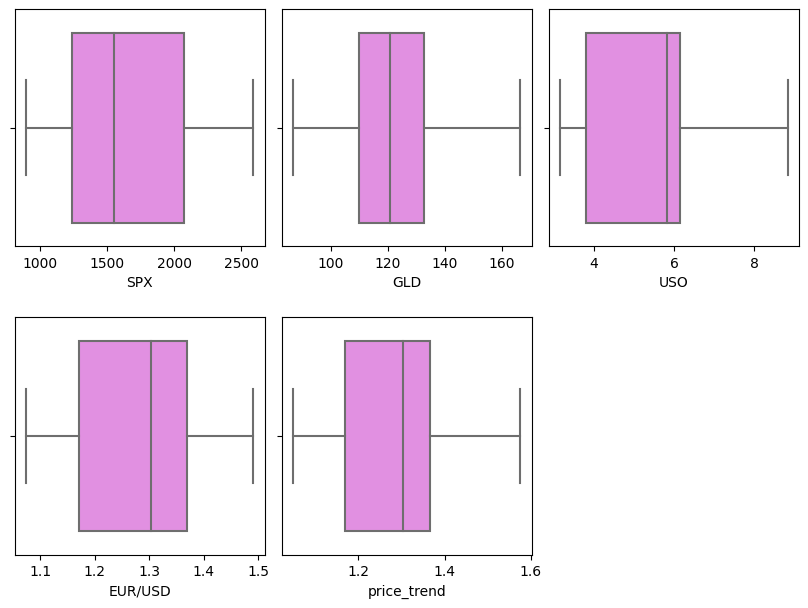

In [445]:
# After removing the outliers
fig = plt.figure(figsize=(8, 6))
temp = gold_data.drop("Date", axis=1).columns.tolist()
for i, item in enumerate(temp):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=gold_data, x=item, color='violet')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.show()

## Modeling the Data

In [446]:
X = gold_data.drop(['Date','GLD','price_trend'],axis=1)
Y = gold_data['GLD']

In [447]:
X.isna().sum()

SPX        0
USO        0
EUR/USD    0
dtype: int64

Splitting into Training data and Test Data

In [448]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

# Scalling the data:
Before we train the model on our data we should perform scaling on our data to normalize. After scaling the data our mean of each column becomes zero and their standard deviation becomes 1. It is also called z-score normalization since we subtract the mean of the column from each element and divide it by the standard deviation of the column. It brings all the columns to the same scale and directly comparable with one another.

In [449]:
# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the StandardScaler on the training dataset
scaler.fit(X_train)

# Transform the training dataset
# using the StandardScaler
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

# Linear Regression


In [450]:
lr=Lasso()
lr.fit(x_train_scaled,Y_train)
test_data_prediction1 = lr.predict(x_test_scaled)
error_score = metrics.r2_score(Y_test, test_data_prediction1)
print("R squared error : ", error_score)

R squared error :  0.0013793587332955326


Model Training:
Random Forest Regressor

In [451]:
RF = RandomForestRegressor(n_estimators=100)

In [452]:
# training the model
RF.fit(x_train_scaled,Y_train)

RandomForestRegressor()

Model Evaluation

In [453]:
# prediction on Test Data
test_data_prediction = RF.predict(x_test_scaled)

In [460]:
test_data_prediction.shape

(458,)

In [455]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9564265001449201


Compare the Actual Values and Predicted Values in a Plot

In [456]:
Y_test = list(Y_test)

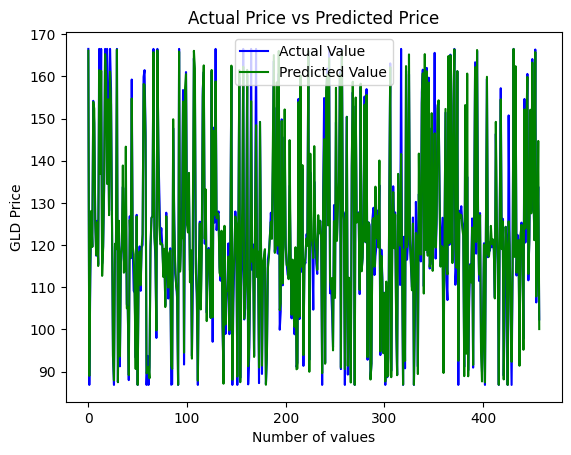

In [457]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [458]:
# dump model using pickle library
import pickle

# dump model in file model.pkl
pickle.dump(RF, open('model.pkl', 'wb'))